# Object detection using the YOLO V4 pre-trained mode

*by Georgios K. Ouzounis*

In this exercise we will experiment with object detection in still images using the YOLO V4 pre-trained model 

## Setup

In [ ]:
# import the relevant libraries
import numpy as np
import cv2 


#Before running the piece of command given below, make sure that you have uploaded the requirements.txt file from your local system to the Google Colab environment


In [ ]:
#run the requirements.txt file for installing all the required libraries in one go
!pip install -r requirements.txt

## Get the model



In [ ]:
# First, create a directory to store the model
%mkdir model

In [ ]:
# Enter the directory and download the necessary files 
%cd model
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/data/coco.names
%cd ..

##  Get the test data

In [ ]:
# Option 1: Download a test image from the web
!wget https://github.com/georgiosouzounis/object-detection-yolov4/raw/main/data/pretrained/people_bicycles.jpg

In [ ]:
# Option 2: Mount your Google Drive and select the image of your chioce
from google.colab import drive
drive.mount('/content/drive')

# Copy a test file locally or use it directly from the mounted drive 
# Customize this example for your drive structure
%cp drive/MyDrive/object_detection/people_bicycles.jpg .

## Read test image

In [ ]:
# Read file
test_img = cv2.imread('people_bicycles.jpg')

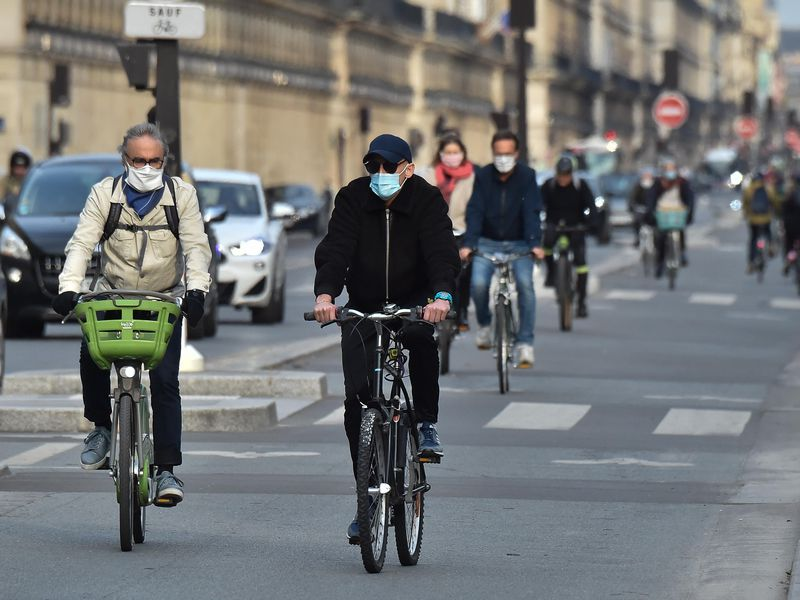

In [ ]:
# Display test image
# Import the cv2_imshow as a replacement of cv2.imshow to prevent errors
from google.colab.patches import cv2_imshow
cv2_imshow(test_img)

## Image2Blob

Convert the image to blob for model compatibility using the OpenCV built-in dnn.blobFromImage() method

Argument explanations:
- **scalefactor**: multiplication factor for each pixel to rescale its intensity in the range of [0,1]. No contrast stretching is performed. Scalefactor is set to 1/255.0 = 0.003922.
- **new_size**: rescaling the size of the image for network compatibility. We use (416, 416). Other supported sizes are (320, 320) and (609, 609). The greater the size, the better the prediction accuracy - but at the cost of a higher computational load.
- **swapRB**: This is a binary flag that, if set, instructs OpenCV to swap the red and blue channels. This is because OpenCV stores images in the BGR order, but YOLO requires them in the RGB order.
- **crop**: This is a binary flag that, if set, instructs OpenCV to crop an image after resizing.


In [ ]:
scalefactor = 1.0/255.0
new_size = (416, 416)
blob = cv2.dnn.blobFromImage(test_img, scalefactor, new_size, swapRB=True, crop=False)

## Customize the YOLO detector

class labels:

In [ ]:
class_labels_path = "/content/model/coco.names"
class_labels = open(class_labels_path).read().strip().split("\n")
class_labels

Bounding box color definitions; two options:

1. Create a template set of colors that is repeated until each class gets one assigned to visualize the effect of this code execute the next block

In [ ]:
# declare the repeating bounding box colors for each class 
# 1st: create a list of colors as an RGB string array
# Example: Red, Green, Blue, Yellow, Magenta
class_colors = ["255,0,0","0,255,0","0,0,255","255,255,0","255,0, 255"]

#2nd: split the array on comma-separated strings and change each string type to integer
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]

#3d: convert the array or arrays to a numpy array
class_colors = np.array(class_colors)

#4th: tile this to get 80 class colors, i.e., as many as the classes  (16 rows of 5 colors each). 
# If you want unique colors for each class, you may randomize the color generation 
# or set them manually
class_colors = np.tile(class_colors,(16,1))

To visualize the effect of this code execute the next block

In [ ]:
def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

for i in range(16):
  line = ""
  for j in range(5):
    class_id = i*5 + j
    class_id_str = str(class_id)
    text = "class" + class_id_str
    colored_text = colored(class_colors[class_id][0], class_colors[class_id][1], class_colors[class_id][2], text)
    line += colored_text
  print(line)

2. Or simply create random colors:

In [ ]:
class_colors = np.random.randint(0, 255, size=(len(class_labels), 3), dtype="uint8")

## Load and run the model

In [ ]:
# Load the pre-trained model 
yolo_model = cv2.dnn.readNetFromDarknet('model/yolov4.cfg','model/yolov4.weights')

In [ ]:
# Read the network layers/components. The YOLO V4 neural network has 379 components.
# They consist of convolutional layers (conv), rectifier linear units (relu) etc.:
model_layers = yolo_model.getLayerNames()
print("number of network components: " + str(len(model_layers))) 
print(model_layers)

number of network components: 379
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'm

In [ ]:
# Extract the output layers

# In the code that follows:
# - model_layer: returns the index of each output layer in the range of 1-379
# - model_layer - 1: corrects  this to the range of 0-378
# - model_layers[model_layer - 1]: returns the indexed layer name 
output_layers = [model_layers[model_layer - 1] for model_layer in yolo_model.getUnconnectedOutLayers()]

# YOLOv4 deploys the same YOLO head as YOLOv3 for detection with   
# The anchor-based detection steps and three levels of detection granularity 
print(output_layers)

['yolo_139', 'yolo_150', 'yolo_161']


In [ ]:
# Input the pre-processed blob into the model
yolo_model.setInput(blob)

# Compute the forward pass for the input, storing the results per output layer in a list
obj_detections_in_layers = yolo_model.forward(output_layers)

# Verify the number of sets of detections
print("number of sets of detections: " + str(len(obj_detections_in_layers)))

number of sets of detections: 3


Note: The YOLO architecture offers three detection layers that generate feature maps of sizes 15x15x255, 30x30x255, and 60x60x255. Each detection layer is tasked with finding objects of a given size range.

<img src="https://blog.roboflow.com/content/images/2020/06/image-19.png" width="300"/>

## Analyze the results

The objective is to get each object detected from each output layer and evaluate the algorithm’s confidence score against a threshold. For high-confidence detections, we extract the class ID and the bounding box info.

In [ ]:
def object_detection_analysis(test_image, obj_detections_in_layers, confidence_threshold): 

  # get the image dimensions  
  img_height = test_img.shape[0]
  img_width = test_img.shape[1]

  result = test_image.copy()
  
  # Loop over each output layer 
  for object_detections_in_single_layer in obj_detections_in_layers:
	  # Loop over the detections in each layer
      for object_detection in object_detections_in_single_layer:  
        # obj_detection[1]: bbox center pt_x
        # obj_detection[2]: bbox center pt_y
        # obj_detection[3]: bbox width
        # obj_detection[4]: bbox height
        # obj_detection[5]: confidence scores for all detections within the bbox 

       # Get the confidence scores of all the objects detected with the bounding box
        prediction_scores = object_detection[5:]
       # Consider the highest score being associated with the winning class
        # Get the class ID from the index of the highest score  
        predicted_class_id = np.argmax(prediction_scores)
        # Get the prediction confidence
        prediction_confidence = prediction_scores[predicted_class_id]
    
       # Consider object detections with a confidence score higher than the threshold
        if prediction_confidence > confidence_threshold:
            # Get the predicted label
            predicted_class_label = class_labels[predicted_class_id]
           # Compute the bounding box coordinates scaled for the input image 
            # Scaling is a multiplication of the float coordinate with the appropriate image dimension
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            # Get the bounding box centroid (x,y), width and, height as integers
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            # To get the starting x and y coordinates, we subtract half the width and half the height from the centroid, respectively 
            # For even values of width and height of bboxes adjacent to the  image border
            #  This may generate a value -1, which is prevented by the max() operator given below
            start_x_pt = max(0, int(box_center_x_pt - (box_width / 2)))
            start_y_pt = max(0, int(box_center_y_pt - (box_height / 2)))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height
            
            # Get a random mask color from the numpy array of colors
            box_color = class_colors[predicted_class_id]
            
            # Convert the color numpy array as a list and apply to text and box
            box_color = [int(c) for c in box_color]
            
            # Print the prediction on the console
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))
            
            # Draw the rectangle and text in the image
            cv2.rectangle(result, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(result, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)
  return result


In [ ]:
# Test the fuction you just created

confidence_threshold = 0.2
result_raw = object_detection_analysis(test_img, obj_detections_in_layers, confidence_threshold)

## Visualize the detections

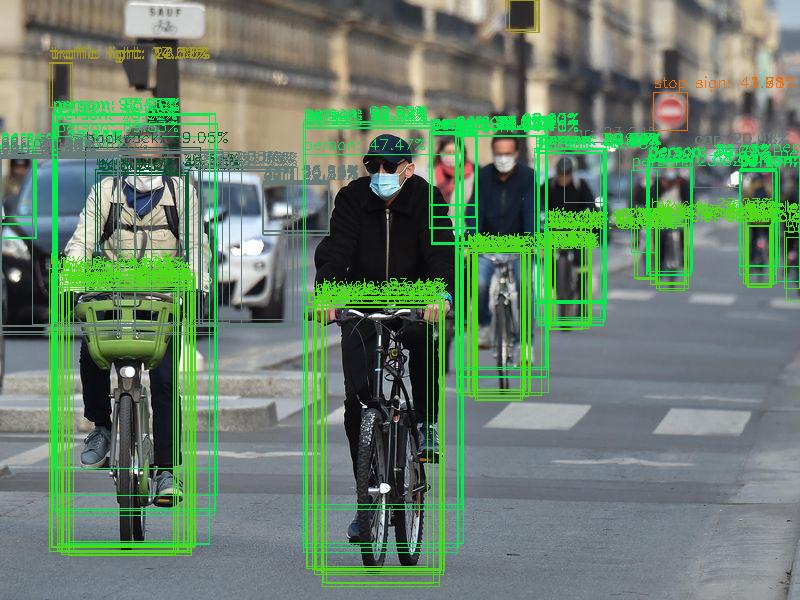

In [ ]:
cv2_imshow(result_raw)

## Non-Maxima Suppression (NMS)

Supress fully or partially overlapping bounding boxes

In [ ]:
# Step 1: declare lists for the arguments of interest: classID, bbox info, and detection confidences
class_ids_list = []
boxes_list = []
confidences_list = []

The next 4 blocks of code area available as a single function in ```object_detections_functions.py```

In [ ]:
# Step 2: populate those lists from the detections

def object_detection_attributes(test_image, obj_detections_in_layers, confidence_threshold):
  # Get the image dimensions  
  img_height = test_img.shape[0]
  img_width = test_img.shape[1]
  
  # Loop over each output layer 
  for object_detections_in_single_layer in obj_detections_in_layers:
    # Loop over the detections in each layer
    for object_detection in object_detections_in_single_layer:  
      # Get the confidence scores of all objects detected with the bounding box
      prediction_scores = object_detection[5:]
      # Consider the highest score being associated with the winning class
      # Get the class ID from the index of the highest score 
      predicted_class_id = np.argmax(prediction_scores)
      # Get the prediction confidence
      prediction_confidence = prediction_scores[predicted_class_id]
      
      # Consider object detections with confidence score higher than threshold
      if prediction_confidence > confidence_threshold:
        # Get the predicted label
        predicted_class_label = class_labels[predicted_class_id]
        # Compute the bounding box cooridnates scaled for the input image
        bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
        (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
        start_x_pt = max(0, int(box_center_x_pt - (box_width / 2)))
        start_y_pt = max(0, int(box_center_y_pt - (box_height / 2)))
        
         # Update the three lists for nms processing
        # - confidence is needed as a float 
        # - the bbox info has the openCV Rect format
        class_ids_list.append(predicted_class_id)
        confidences_list.append(float(prediction_confidence))
        boxes_list.append([int(start_x_pt), int(start_y_pt), int(box_width), int(box_height)])

Populate the lists with our detections

In [ ]:
score_threshold = 0.5
object_detection_attributes(test_img, obj_detections_in_layers, score_threshold)

compute the [NMS](https://docs.opencv.org/master/d6/d0f/group__dnn.html#ga9d118d70a1659af729d01b10233213ee)


In [ ]:
# The NMS for a set of overlapping bboxes returns the ID of the one with the highest 
# Confidence score while suppressing all others (non-maxima)
# - score_threshold: a threshold used to filter boxes by score 
# - nms_threshold: a threshold used in non-maximum suppression
 

score_threshold = 0.5
nms_threshold = 0.4


winner_ids = cv2.dnn.NMSBoxes(boxes_list, confidences_list, score_threshold, nms_threshold)

In [ ]:
# Loop through the final set of detections remaining after NMS, draw the bounding box, and write text
for winner_id in winner_ids:
    max_class_id = winner_id
    box = boxes_list[max_class_id]
    start_x_pt = box[0]
    start_y_pt = box[1]
    box_width = box[2]
    box_height = box[3]
    
    # Get the predicted class id and label
    predicted_class_id = class_ids_list[max_class_id]
    predicted_class_label = class_labels[predicted_class_id]
    prediction_confidence = confidences_list[max_class_id]

    # Obtain the bounding box end cooridnates
    end_x_pt = start_x_pt + box_width
    end_y_pt = start_y_pt + box_height
    
    # Get a random mask color from the numpy array of colors
    box_color = class_colors[predicted_class_id]
    
    # Convert the color numpy array as a list and apply to text and box
    box_color = [int(c) for c in box_color]
    
    # Print the prediction in console
    predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
    print("predicted object {}".format(predicted_class_label))
    
    # Draw rectangle and text in the image
    cv2.rectangle(test_img, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
    cv2.putText(test_img, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

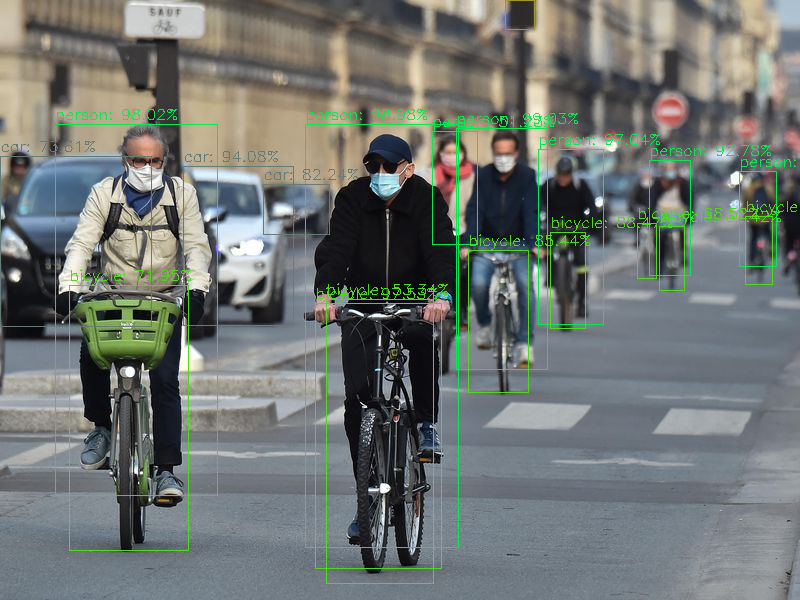

In [ ]:
cv2_imshow(test_img)